In [11]:
import random

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft

In [12]:
signal = lambda t: np.sin(2 * np.pi * t * 5) + 3 * np.sin(2 * np.pi * t) + 2 * np.sin(2 * np.pi * t * 2) + np.sin(
    2 * np.pi * t * 10)

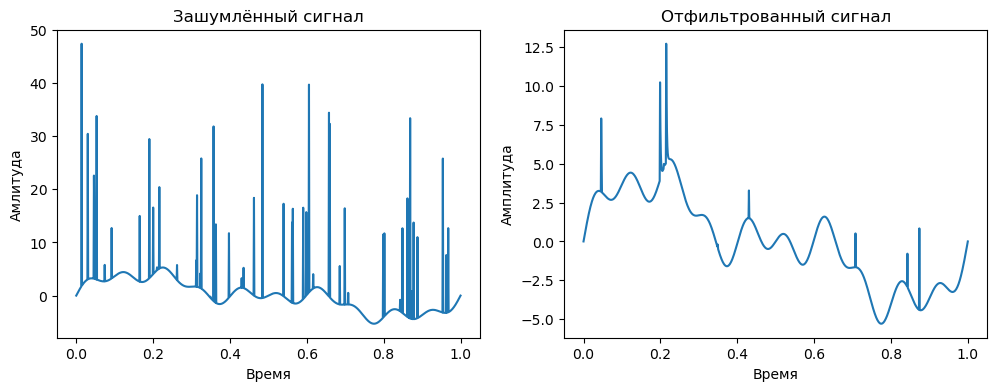

In [13]:
sample_len = 1000
noise_ratio = 0.05
t = np.linspace(0, 1, sample_len)
y = signal(t)
noise_samples = random.sample(range(sample_len), int(sample_len * noise_ratio))
y_noisy = np.copy(y)
for noise_sample in noise_samples:
    y_noisy[noise_sample] += abs(np.random.normal(0, 20))

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(t, y_noisy)
plt.title("Зашумлённый сигнал")
plt.xlabel("Время")
plt.ylabel("Амлитуда")

mean = np.mean(y_noisy)
std = np.std(y_noisy)

filtered_signal = np.copy(y_noisy)
for i in range(sample_len):
    if filtered_signal[i] >= mean + std * 0.5:
        filtered_signal[i] = (filtered_signal[i - 1] + filtered_signal[i + 1]) / 2
plt.subplot(122)
plt.plot(t, filtered_signal)
plt.title("Отфильтрованный сигнал")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.show()

/usr/lib/python3.12/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/lib/python3.12/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/lib/python3.12/site-packages/numpy/_core/_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


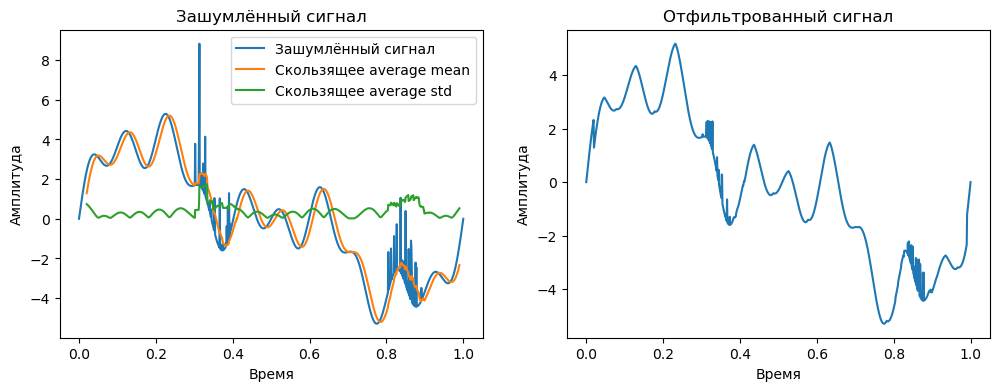

In [14]:
sample_len = 1000
noise_ratio = 0.04
t = np.linspace(0, 1, sample_len)
y = signal(t)
noise_samples = random.sample(
    list(range(sample_len - 200, sample_len - 100)) + list(range(sample_len - 700, sample_len - 600)),
    int(sample_len * noise_ratio))
y_noisy = np.copy(y)
for noise_sample in noise_samples:
    y_noisy[noise_sample] += abs(np.random.normal(0, 2))

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(t, y_noisy)
plt.title("Зашумлённый сигнал")
plt.xlabel("Время")
plt.ylabel("Амплитуда")

window_side = 10
moving_average_mean = np.zeros(shape=(sample_len - window_side * 2), dtype=float)
moving_average_std = np.zeros(shape=(sample_len - window_side * 2), dtype=float)
for i in range(len(moving_average_std)):
    moving_average_std[i] = np.std(y_noisy[i - window_side:i + window_side + 1])
    moving_average_mean[i] = np.mean(y_noisy[i - window_side:i + window_side + 1])

plt.plot(t[window_side:sample_len - window_side], moving_average_mean)
plt.plot(t[window_side:sample_len - window_side], moving_average_std)
plt.legend(["Зашумлённый сигнал", "Скользящее average mean", "Скользящее average std"])

filtered_signal = np.copy(y_noisy)
for i in range(len(moving_average_std)):
    if y_noisy[i + window_side] >= moving_average_mean[i] + moving_average_std[i] * 0.05:
        filtered_signal[i + window_side] = moving_average_mean[i]

plt.subplot(122)
plt.plot(t, filtered_signal)
plt.title("Отфильтрованный сигнал")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.show()

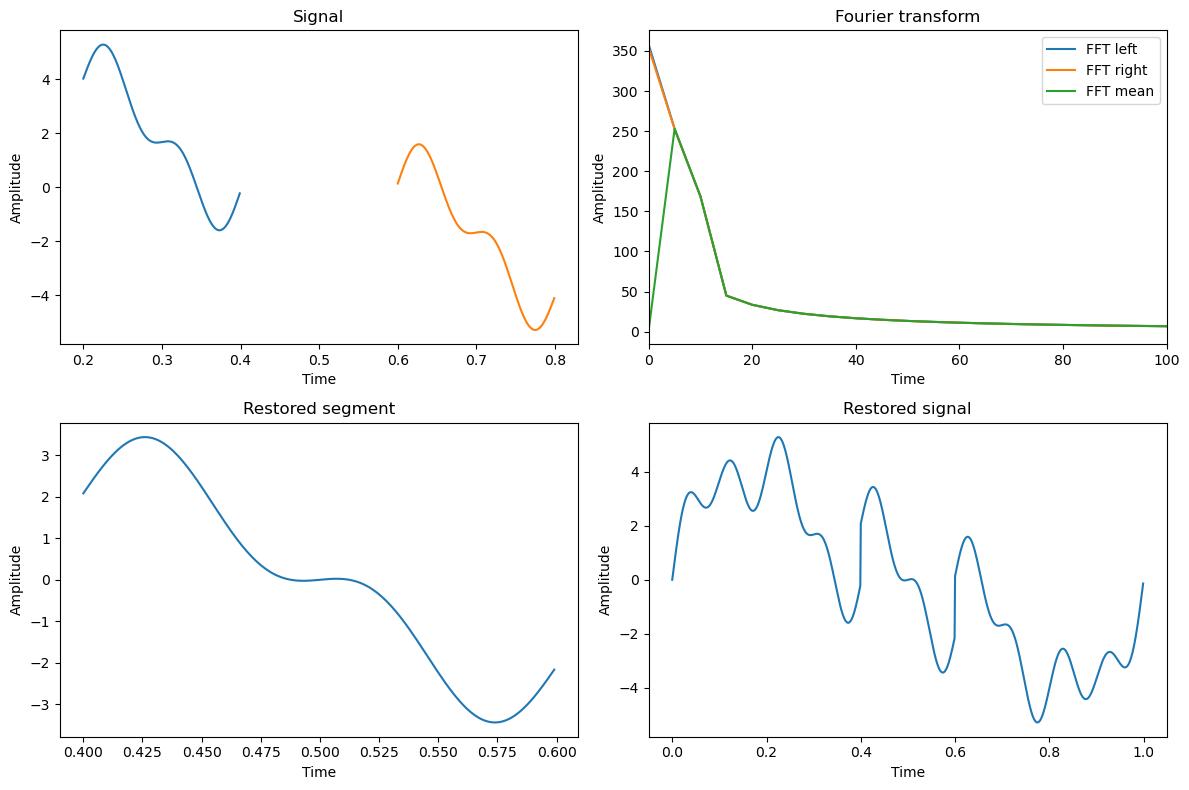

In [15]:
freq = 1000
t = np.linspace(0, 1, freq, endpoint=False)
signal_y = signal(t)

window_start = int(0.4 * freq)
window_end = int(0.6 * freq)

side_len = window_end - window_start

missing_indices = list(range(window_start, window_end))

signal_cut = np.copy(signal_y)
for i in missing_indices:
    signal_cut[i] = np.nan

signal_left = signal_cut[window_start - side_len:window_start]
signal_right = signal_cut[window_end:window_end + side_len]

plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.plot(t[window_start - side_len:window_start], signal_left)
plt.plot(t[window_end:window_end + side_len], signal_right)
plt.title("Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")

fft_left = fft(signal_left)
fft_right = fft(signal_right)

fft_x = fftfreq(side_len, 1 / freq)

plt.subplot(222)
plt.xlim(0, 100)
plt.plot(fft_x[:side_len // 2], np.abs(fft_left[:side_len // 2]))
plt.plot(fft_x[:side_len // 2], np.abs(fft_right[:side_len // 2]))
fft_mean = np.mean(np.array([fft_left, fft_right]), axis=0)
plt.plot(fft_x[:side_len // 2], np.abs(fft_mean[:side_len // 2]))
plt.title("Fourier transform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(["FFT left", "FFT right", "FFT mean"])

window_ifft = ifft(fft_mean)
plt.subplot(223)
plt.plot(t[window_start:window_end], np.real(window_ifft))
plt.title("Restored segment")
plt.xlabel("Time")
plt.ylabel("Amplitude")

for i in missing_indices:
    signal_cut[i] = np.real(window_ifft[i - window_start])

plt.subplot(224)
plt.plot(t, signal_cut)
plt.title("Restored signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

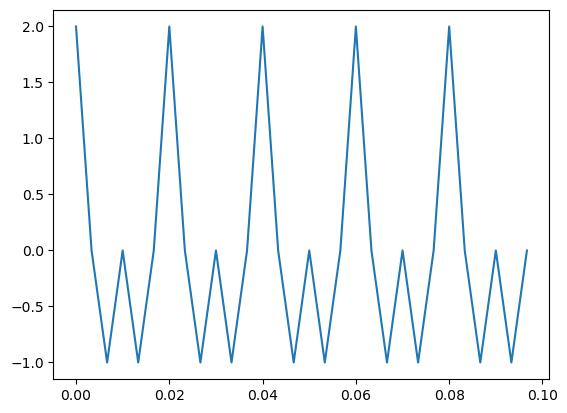

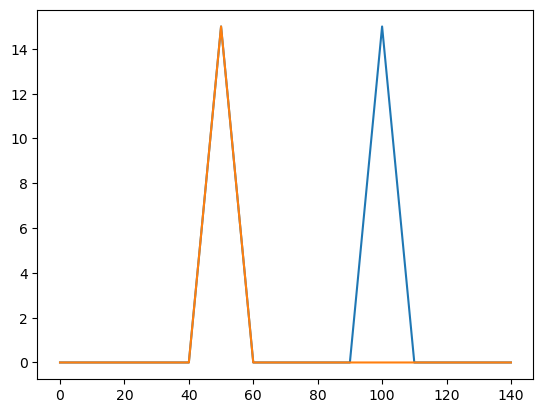

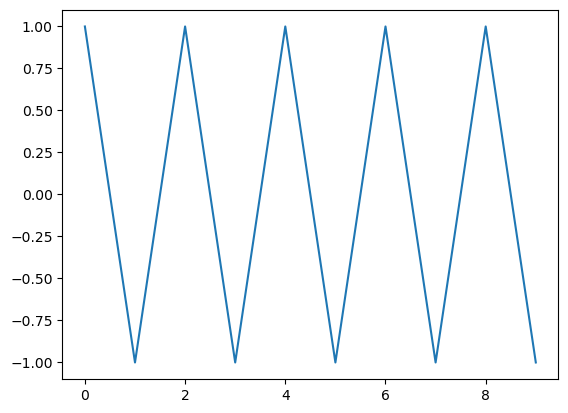

In [16]:
freq = 300
t_end = 0.1
signal = lambda t: np.cos(2 * np.pi * t * 50) + np.cos(2 * np.pi * t * 100)
t = np.linspace(0, t_end, int(freq * t_end), endpoint=False)
signal_y = signal(t)
plt.plot(t, signal_y)
plt.show()

fft_y = np.abs(fft(signal_y))
fft_x = fftfreq(int(freq * t_end), 1 / freq)

plt.plot(fft_x[:int(freq * t_end) // 2], fft_y[:int(freq * t_end) // 2])
plt.plot()

fft_y[10] = 0
fft_y[20] = 0

plt.plot(fft_x[:int(freq * t_end) // 2], fft_y[:int(freq * t_end) // 2])
plt.show()

ifft_y = np.real(ifft(fft_y))

new_freq = 100
new_t = np.linspace(0, t_end, int(new_freq * t_end), endpoint=False)
new_signal_y = np.zeros_like(new_t)
for i in range(len(new_t)):
    new_signal_y[i] = ifft_y[i * 3]

plt.plot(new_signal_y)
plt.show()

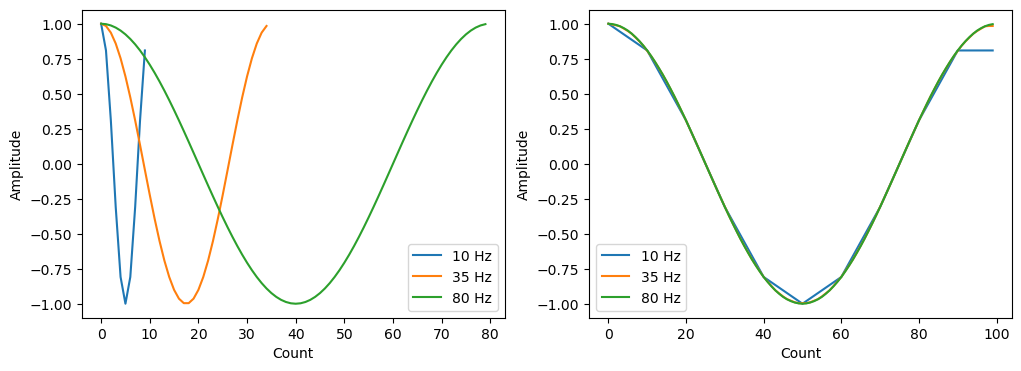

In [17]:
fs1 = 10
fs2 = 35
fs3 = 80
f = 1
duration = 1

t1 = np.linspace(0, duration, int(fs1 * duration), endpoint=False)
signal1 = np.cos(2 * np.pi * f * t1)

t2 = np.linspace(0, duration, int(fs2 * duration), endpoint=False)
signal2 = np.cos(2 * np.pi * f * t2)

t3 = np.linspace(0, duration, int(fs3 * duration), endpoint=False)
signal3 = np.cos(2 * np.pi * f * t3)

new_fs = 100

t_new = np.linspace(0, duration, int(new_fs * duration), endpoint=False)

interp1 = np.interp(t_new, t1, signal1)
interp2 = np.interp(t_new, t2, signal2)
interp3 = np.interp(t_new, t3, signal3)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(signal1)
plt.plot(signal2)
plt.plot(signal3)
plt.xlabel("Count")
plt.ylabel("Amplitude")
plt.legend(["10 Hz", "35 Hz", "80 Hz"])

plt.subplot(122)
plt.plot(interp1)
plt.plot(interp2)
plt.plot(interp3)
plt.xlabel("Count")
plt.ylabel("Amplitude")
plt.legend(["10 Hz", "35 Hz", "80 Hz"])

plt.show()